# Assumption of regression
In this notebook we will verify the two conditions of predictors and outcome with the advertizing dataset [link of the course](https://openclassrooms.com/en/courses/5873596-design-effective-statistical-models-to-understand-your-data/6232921-check-assumptions-of-regression)
* linearity
* colinearity


In [2]:
import pandas as pd
df=pd.read_csv("data/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## 1 Linearity
Now let's plot the scatter of TV variable and the Sales which is the outcome


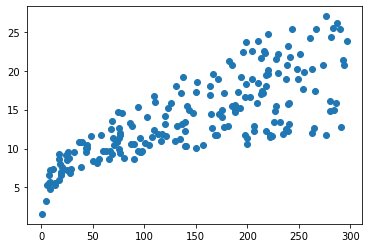

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df.TV,df.Sales)


The plot shows us that their are a certain linearity of the two variables

Now for comparaison lets plot the square of the TV and the square root of the TV with the Sales

In [7]:
import numpy as np
df["sqrTV"]=np.square(df["TV"])
df["sqrtTV"]=np.sqrt(df["TV"])
df.head()

,TV,Radio,Newspaper,Sales,sqrTV,sqrtTV
0,230.1,37.8,69.2,22.1,52946.01,15.169047
1,44.5,39.3,45.1,10.4,1980.25,6.670832
2,17.2,45.9,69.3,9.3,295.84,4.147288
3,151.5,41.3,58.5,18.5,22952.25,12.308534
4,180.8,10.8,58.4,12.9,32688.64,13.446189


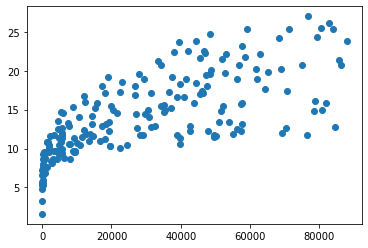

In [10]:
plt.scatter(df.sqrTV,df.Sales)


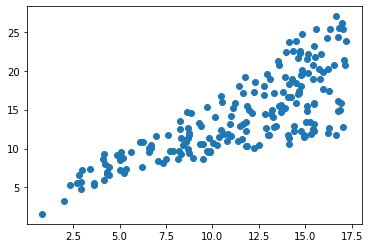

In [9]:
plt.scatter(df.sqrtTV,df.Sales)

After ploting we see that the plot of square root is most linear one

Now lets compare the three univariate  models

In [11]:
import statsmodels.formula.api as smf
formula={
    "Sales ~ TV",
    "Sales ~ sqrtTV",
    "Sales ~ sqrTV"
}
for string in formula:
    results=smf.ols(formula=string,data=df).fit()
    print("\n \n ---{}".format(string))
    print("R squared : {} \t Adj R-squared {}  ".format(results.rsquared,results.rsquared_adj) )
    print("log likelihood : {} \  ".format(results.llf) )


 
 ---Sales ~ sqrTV
R squared : 0.541080387487864 	 Adj R-squared 0.5387626116670957  
log likelihood : -535.8004374591964 \  

 
 ---Sales ~ TV
R squared : 0.611875050850071 	 Adj R-squared 0.6099148238341623  
log likelihood : -519.0456637681739 \  

 
 ---Sales ~ sqrtTV
R squared : 0.6229008902306743 	 Adj R-squared 0.6209963492722435  
log likelihood : -516.163735954182 \  


The Sales ~ sqrtTV are the biggest the R squared and log likelihood .So it is the best model

<span style="color:red">Which shows having the linearity between predictors and outcome improve the model</span>



## 2 Colinearity
### variance inflation factor

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
predictors=["TV","Radio","Newspaper"]
for i in range(len(predictors)):
    print(" VIF of {} : {:.2f} ".format(predictors[i],VIF(df[predictors].values,i)))

 VIF of TV : 2.49 
 VIF of Radio : 3.29 
 VIF of Newspaper : 3.06 


#### All of the VIF are below 5 so we can conclude that we dont have colinearity in our dataset


description of the assumptions

<img src="assumption.PNG">